<a href="https://colab.research.google.com/github/sriram403/MachineLearningBlogs/blob/main/MulticlassClassificationBasicsExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the given image 🐱‍👓

##Loading the Data 

In [1]:
#Loading the data from tensorflow.keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

##Splitting the data into training and testing samples

In [2]:
(x_train,x_label),(y_train,y_label) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#Class names to predict
class_names = ["T-shirt_or_top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

##Normalize the data 

In [4]:
x_train_norm = x_train/255
y_train_norm = y_train/255

##Creating a model 

In [5]:
Nemo = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(50,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")])
Nemo.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = Nemo.fit(x_train_norm,x_label,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5230 - accuracy: 0.8100 - val_loss: 0.4248 - val_accuracy: 0.8457
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3817 - accuracy: 0.8614 - val_loss: 0.3638 - val_accuracy: 0.8684
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3486 - accuracy: 0.8721 - val_loss: 0.3702 - val_accuracy: 0.8637
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3208 - accuracy: 0.8801 - val_loss: 0.3771 - val_accuracy: 0.8649
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3052 - accuracy: 0.8869 - val_loss: 0.3400 - val_accuracy: 0.8782
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2926 - accuracy: 0.8905 - val_loss: 0.3499 - val_accuracy: 0.8713
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2780 - accuracy: 0.8974 - val_loss: 0.3208 - val_accuracy:

##Confusion matrix

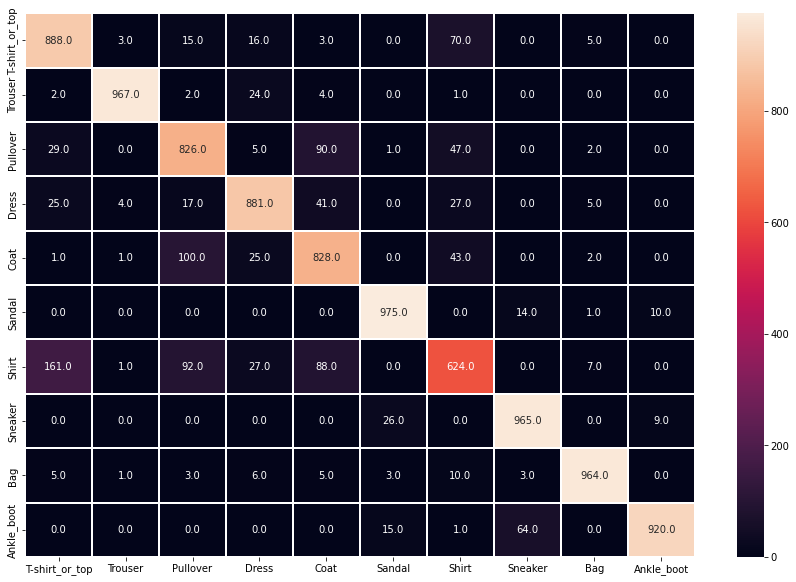

In [20]:
pred = Nemo.predict(y_train_norm)
import numpy as np
pred_label = np.argmax(pred,axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_label,pred_label),annot=True,fmt=".1f",linewidths=1,xticklabels=[class_names[i]for i in range(len(class_names))],yticklabels=[class_names[i]for i in range(len(class_names))])

##Predicting the images

In [7]:
def plot_pred(model,images,true_label,classes,iter=6):
  for i in range(iter):
    plt.subplot(3,3,i+1)
    random_index = np.random.randint(0,len(images))
    plt.imshow(images[random_index])
    image = images[random_index]
    sel_image = image.reshape(1,28,28)
    pred = model.predict(sel_image)
    pred_label = np.argmax(pred,axis=1)
    pred_class = classes[pred_label[0]]
    true_class = classes[true_label[random_index]]
    if true_class == pred_class:
      col = "Green"
    else:
      col = "Red"
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"The Prediction : {pred_class}{tf.reduce_max(pred)*100:.1f}%, True Image : {true_class}",color=col)

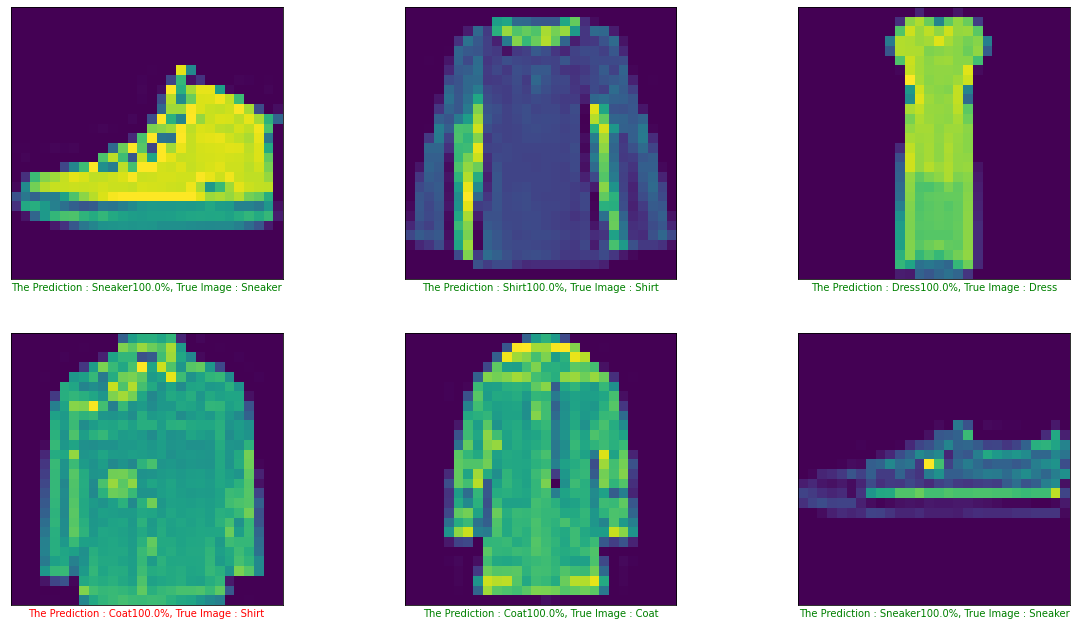

In [8]:
plt.figure(figsize=(20,17))
plot_pred(Nemo,y_train,y_label,class_names)

##Getting the specific image from dataset and making prediction on it

In [15]:
def plot_pred_specific(imagename,model,images,true_label,classes,iter=6,images_count=3):
  for i in range(iter):
    
    plt.subplot(3,3,i+1)
    
    index = class_names.index(imagename)

    target_total_index = np.where(y_label==index)[0]

    random_index = np.random.choice(target_total_index,1)
    
      
    plt.imshow(images[random_index[0]])
      
    image = images[random_index]
    sel_image = image.reshape(1,28,28)
      
    pred = model.predict(image)
    pred_label = np.argmax(pred,axis=1)

    pred_class = classes[pred_label[0]]
    true_class = classes[true_label[random_index[0]]]
      
    if true_class == pred_class:
      col = "Green"
    else:
      col = "Red"
      
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"the pred:{pred_class}{tf.reduce_max(pred)*100:.1f}%,true label:{true_class}",color=col)

In [16]:
class_names

['T-shirt_or_top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle_boot']

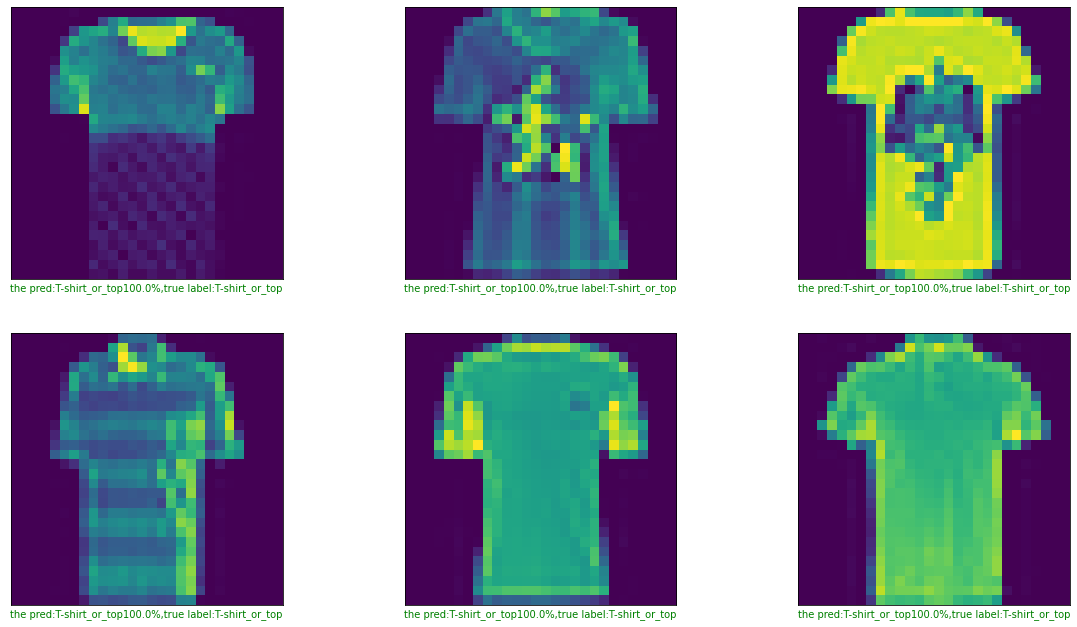

In [17]:
plt.figure(figsize=(20,17))
plot_pred_specific("T-shirt_or_top",Nemo,y_train,y_label,class_names);

#Completed :) 🐱‍👤